In [1]:
!pip install python-binance pandas numpy plotly nbformat ipykernel scikit-learn seaborn matplotlib
import pandas as pd
import numpy as np
from binance.client import Client
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

DEPRECATION: Loading egg at /Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/ibapi-10.34.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
# In your notebook cell
from app_df import PTLClient, get_historical_dataframe, DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID

# Create an instance of your client
client = PTLClient(DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID)

# Now request historical data (for example, EUR USD data) and get it as a DataFrame.
# Adjust the parameters as needed (symbol, timeframe, etc.)
df = get_historical_dataframe(client, "EUR", "1 day", "20241230 00:00:00 US/Eastern", "2 W")

print(df.head())

ERROR -1 1740109791690 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 1740109791690 2104 Market data farm connection is OK:cashfarm
ERROR -1 1740109791691 2104 Market data farm connection is OK:usfarm
ERROR -1 1740109791691 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 1740109791691 2106 HMDS data farm connection is OK:ushmds
ERROR -1 1740109791691 2158 Sec-def data farm connection is OK:secdefil


next valid id is 1


ERROR 1 1740109794680 10314 End Date/Time: The date, time, or time-zone entered is invalid. The correct format is yyyymmdd hh:mm:ss xx/xxxx where yyyymmdd and xx/xxxx are optional. E.g.: 20031126 15:59:00 US/Eastern  Note that there is a space between the date and time, and between the time and time-zone.  If no date is specified, current date is assumed. If no time-zone is specified, local time-zone is assumed(deprecated).  You can also provide yyyymmddd-hh:mm:ss time is in UTC. Note that there is a dash between the date and time in UTC notation.


getting bar data for EUR 1 day


KeyboardInterrupt: 

In [73]:
df.shape

(135, 5)

In [74]:
def add_ema(df, periods=[20, 50, 100, 200]):
  """
    Add Exponential Moving Averages (EMAs) to the DataFrame.
    : param df: DataFrame with price data : param periods: List of periods for EMAs return: DataFrame with added EMA columns
  """
  for period in periods:
      df[f'EMA_{period}'] = df['Close'].ewm(span=period, adjust=False).mean()
  return df

In [75]:
df = add_ema(df)
df.head(10)

Open     High      Low    Close  Volume  \
Datetime                                                                
2024-12-01 17:15:00-05:00  1.05635  1.05700  1.05334  1.05438      -1   
2024-12-01 19:00:00-05:00  1.05438  1.05463  1.05199  1.05235      -1   
2024-12-01 23:00:00-05:00  1.05235  1.05371  1.05019  1.05027      -1   
2024-12-02 03:00:00-05:00  1.05027  1.05288  1.04960  1.05230      -1   
2024-12-02 07:00:00-05:00  1.05230  1.05383  1.04620  1.04690      -1   
2024-12-02 11:00:00-05:00  1.04690  1.04989  1.04605  1.04902      -1   
2024-12-02 15:00:00-05:00  1.04902  1.05159  1.04887  1.04976      -1   
2024-12-02 17:15:00-05:00  1.04980  1.05016  1.04935  1.05007      -1   
2024-12-02 19:00:00-05:00  1.05007  1.05014  1.04823  1.04902      -1   
2024-12-02 23:00:00-05:00  1.04902  1.05117  1.04805  1.04981      -1   

                             EMA_20    EMA_50   EMA_100   EMA_200  
Datetime                                                           
2024-12-01 17:15:00-05:00  1.054380  1.054380  1.054380  1.054380  
2024-12-01 19:00:00-05:00  1.054187  1.054300  1.054340  1.054360  
2024-12-01 23:00:00-05:00  1.053814  1.054142  1.054259  1.054319  
2024-12-02 03:00:00-05:00  1.053669  1.054070  1.054220  1.054299  
2024-12-02 07:00:00-05:00  1.053025  1.053789  1.054075  1.054225  
2024-12-02 11:00:00-05:00  1.052643  1.053602  1.053975  1.054174  
2024-12-02 15:00:00-05:00  1.052369  1.053451  1.053892  1.054130  
2024-12-02 17:15:00-05:00  1.052150  1.053319  1.053816  1.054089  
2024-12-02 19:00:00-05:00  1.051852  1.053150  1.053721  1.054039  
2024-12-02 23:00:00-05:00  1.051657  1.053019  1.053644  1.053997

In [76]:
def plot_data_with_ema(df):
  """
  Create an interactive Plotly plot with candlestick data and EMAs.
  : param df: DataFrame with price and EMA data
  """
  fig = go.Figure()

  # Add candlestick chart
  fig.add_trace(go.Candlestick(
      x=df.index,
      open=df[ 'Open'],
      high=df['High'],
      low=df['Low'],
      close=df[ 'Close'],
      name= 'Candlesticks'
  ))

  # Add EMAs
  for ema_period in [20, 50, 100, 200]:
    fig.add_trace(go.Scatter(
      x=df. index,
      y=df [f'EMA_{ema_period}'],
      mode='lines',
      name=f'EMA {ema_period}'
    ))

  # Customize Layout
  fig.update_layout(
    title="Candlestick Chart with EMAs",
    xaxis_title="Time",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False
  )

  fig.show()

In [77]:
plot_data_with_ema(df)

In [78]:
# Define function to prepare data
def prepare_data(data, sma_window=14, rsi_window=14):
    # Calculate technical indicators
    data['Returns'] = data['Close'].pct_change()
    data['SMA'] = data['Close'].rolling(window=sma_window).mean()
    data['Std'] = data['Close'].rolling(window=sma_window).std()
    # Candle_Binary marks as 0 red candles and 1 green ones
    data['Candle_Binary'] = (data['Returns'] > 0).astype(int)
    data['Momentum'] = data['Close'] - data['Close'].shift(5)
    data['Volatility'] = data['Returns'].rolling(window=5).std()
    data['ma5'] = data['Close'].rolling(window=5).mean()
    data['ma10'] = data['Close'].rolling(window=10).mean()


    # RSI calculation
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # 3) Bar UpDown
    """
      data['Up_Bar'] = (
        (data['High'] > data['High'].shift(1)) & 
        (data['Low']  > data['Low'].shift(1))
    )
    data['Down_Bar'] = (
        (data['High'] < data['High'].shift(1)) & 
        (data['Low']  < data['Low'].shift(1))
    )
    """
  

    # Bar UpDown
    data['Up_Bar'] = (data['Close'] > data['Open']) & (data['Open'] > data['Close'].shift(1))
    data['Down_Bar'] = (data['Close'] < data['Open']) & (data['Open'] < data['Close'].shift(1))
    #df['Up_Bar'] = df['Up_Bar'].astype(int)
    #df['Down_Bar'] = df['Down_Bar'].astype(int)

    # Create features

    # Entire candle + SMA 
    features = ['Returns', 'Volatility', 'ma5', 'ma10', 'Momentum', 'Close', 'High', 'Low', 'Open']

    # Bar UpDown only
    #features = ['Up_Bar']

    # Bar UpDown + RSI
    #features = ['Down_Bar', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'RSI']

    # features = ['SMA', 'Std', 'RSI', 'RSI']
    X = data[features].shift(1)  # Shift by 1 to avoid look-ahead bias

    # Create binary target: 1 if price goes up, 0 if it goes down
    y = data['Candle_Binary']

    # Pips per candle
    data['pips'] = data['Returns'] * 10000

    # Remove NaN values
    X = X.dropna()
    y = y[X.index]

    return X, y

In [79]:
# Prepare de data and split on X = Features and y = Target
X, y = prepare_data(df, sma_window=14)

In [80]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

range(20, 500, 20)


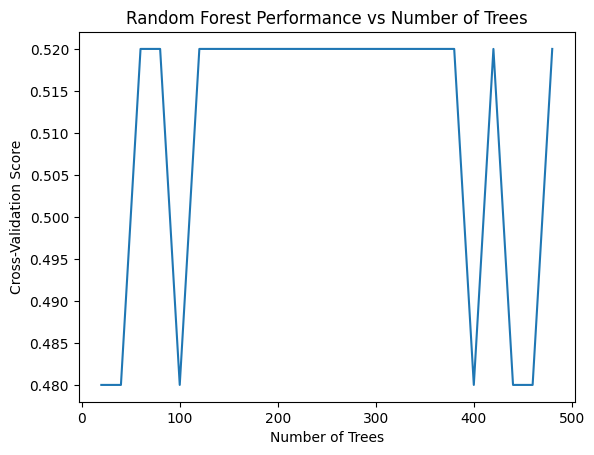

Optimal number of trees: 60


In [83]:
# Verify best number of trees
n_trees = range(20, 500, 20)
print(n_trees)
scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

plt.plot(n_trees, scores)
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Score')
plt.title('Random Forest Performance vs Number of Trees')
plt.show()

optimal_trees = n_trees[np.argmax(scores)]
print(f"Optimal number of trees: {optimal_trees}")

In [84]:
# Train the model
# Random Forest with 10 trees
rf_model = RandomForestClassifier(n_estimators=80, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [85]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nMean Squared Error Report:")
print(mean_squared_error(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Model Accuracy: 0.52

Mean Squared Error Report:
0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.53      0.62      0.57        13

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.51        25
weighted avg       0.52      0.52      0.52        25


Confusion Matrix:
[[5 7]
 [5 8]]


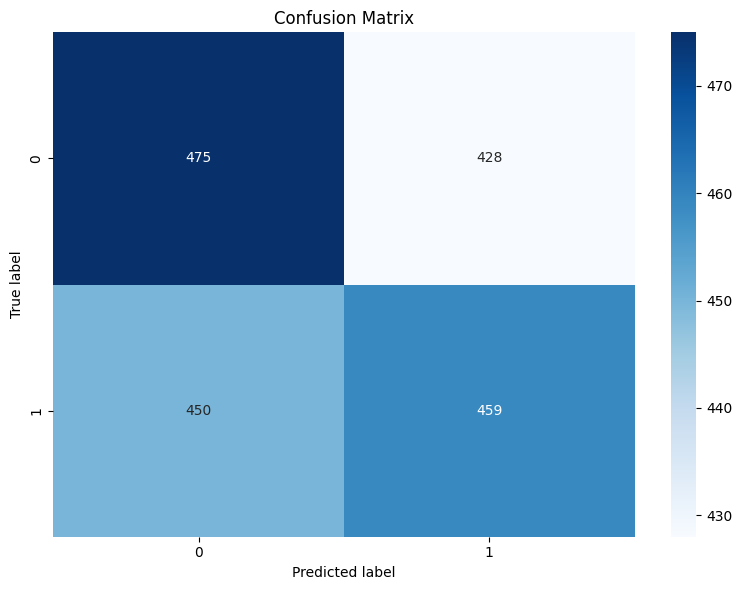

In [33]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [34]:
feature_columns = X.columns.copy()
#feature_columns = feature_columns.get_level_values('Price').tolist()

In [35]:
# Visualize feature importance

feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)  # Sort ascending for better visualization
feature_importance

feature  importance
8        Open    0.093046
5       Close    0.094991
6        High    0.098267
7         Low    0.098344
2         ma5    0.099587
3        ma10    0.104062
4    Momentum    0.132802
0     Returns    0.138074
1  Volatility    0.140827

# Model in Action

With the trained model, now let's test with the df_test dataframe.

In [53]:
# In your notebook cell
from app_df import PTLClient, get_historical_dataframe, DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID

# Create an instance of your client
client = PTLClient(DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID)

df_test = get_historical_dataframe(client, "EUR", "4 hours", "20250217 00:00:00 US/Eastern", "6 M")

print(df_test.head())

ERROR -1 1739940614568 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 1739940614568 2104 Market data farm connection is OK:cashfarm
ERROR -1 1739940614568 2104 Market data farm connection is OK:usopt
ERROR -1 1739940614568 2104 Market data farm connection is OK:eufarmnj
ERROR -1 1739940614568 2104 Market data farm connection is OK:usfarm
ERROR -1 1739940614569 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 1739940614569 2106 HMDS data farm connection is OK:ushmds
ERROR -1 1739940614569 2158 Sec-def data farm connection is OK:secdefil


next valid id is 1
getting bar data for EUR 4 hours
end of data 20240817 00:00:00 US/Eastern 20250217 00:00:00 US/Eastern
                              Open     High      Low    Close  Volume
Datetime                                                             
2024-08-21 17:15:00-04:00  1.11459  1.11580  1.11459  1.11549      -1
2024-08-21 20:00:00-04:00  1.11549  1.11569  1.11405  1.11446      -1
2024-08-22 00:00:00-04:00  1.11446  1.11648  1.11273  1.11369      -1
2024-08-22 04:00:00-04:00  1.11369  1.11509  1.11319  1.11367      -1
2024-08-22 08:00:00-04:00  1.11367  1.11431  1.10981  1.11131      -1


In [48]:
# -------------------------------
# 5. Define Pattern Recognition Functions
# -------------------------------
def is_bullish_engulfing(prev, curr):
    """
    Bullish Engulfing:
      - Previous candle is bearish (Close < Open)
      - Current candle is bullish (Close > Open)
      - Current candle's body engulfs the previous candle's body
    """
    if (prev['Close'] < prev['Open']) and (curr['Close'] > curr['Open']):
        if (curr['Open'] < prev['Close']) and (curr['Close'] > prev['Open']):
            return True
    return False

def is_bearish_engulfing(prev, curr):
    """
    Bearish Engulfing:
      - Previous candle is bullish (Close > Open)
      - Current candle is bearish (Close < Open)
      - Current candle's body engulfs the previous candle's body
    """
    if (prev['Close'] > prev['Open']) and (curr['Close'] < curr['Open']):
        if (curr['Open'] > prev['Close']) and (curr['Close'] < prev['Open']):
            return True
    return False

In [49]:
# Bar UpDown

def is_bullish_bar(prev, curr):
    """
    Bullish Bar:
        - Previous candle is bearish (Close < Open)
        - Current candle is bullish (Close > Open)
        """
    if (prev['Close'] < prev['Open']) and (curr['Close'] > curr['Open']):
        return True


def is_bearish_bar(prev, curr):
    """
    Bearish Bar:
        - Previous candle is bullish (Close > Open)
        - Current candle is bearish (Close < Open)
        """
    if (prev['Close'] > prev['Open']) and (curr['Close'] < curr['Open']):
        return True

In [56]:
# Filter the data to only include the best hours

df_copy = df_test.copy()

# best_hours = [3, 7, 11, 19]
# df_test = df_test[df_test.index.hour.isin(best_hours)]

# Extract the hour from the index and store it in a new column
df_test['hour'] = df_test.index.hour

df_test.head(12)

Open     High      Low    Close  Volume  hour
Datetime                                                                   
2024-08-21 17:15:00-04:00  1.11459  1.11580  1.11459  1.11549      -1    17
2024-08-21 20:00:00-04:00  1.11549  1.11569  1.11405  1.11446      -1    20
2024-08-22 00:00:00-04:00  1.11446  1.11648  1.11273  1.11369      -1     0
2024-08-22 04:00:00-04:00  1.11369  1.11509  1.11319  1.11367      -1     4
2024-08-22 08:00:00-04:00  1.11367  1.11431  1.10981  1.11131      -1     8
2024-08-22 12:00:00-04:00  1.11131  1.11176  1.10987  1.11084      -1    12
2024-08-22 16:00:00-04:00  1.11084  1.11132  1.11075  1.11121      -1    16
2024-08-22 17:15:00-04:00  1.11090  1.11177  1.11090  1.11160      -1    17
2024-08-22 20:00:00-04:00  1.11160  1.11286  1.11129  1.11247      -1    20
2024-08-23 00:00:00-04:00  1.11247  1.11319  1.11124  1.11193      -1     0
2024-08-23 04:00:00-04:00  1.11193  1.11271  1.11108  1.11189      -1     4
2024-08-23 08:00:00-04:00  1.11189  1.11960  1.11054  1.11752      -1     8

In [57]:
X, y = prepare_data(df_test, sma_window=14)
df_test.shape

(876, 18)

In [58]:
# Parameters for backtesting and dynamic model training
capital = 10000.0  # starting capital in USD
trades = []
l_trades_quantity = 0
s_trades_quantity = 0
features_to_predict = ['Returns', 'Volatility', 'ma5', 'ma10', 'Momentum', 'Close', 'High', 'Low', 'Open']
trade_volume = 10
spread = 1.2

# Define best hours for trading (for 4h timeframe in this example)
best_hours_4h = [4, 8, 12, 16, 17, 20, 0]
best_hours_1h = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

def calculate_profit(pips):
    return ((pips - spread) * trade_volume)

# Number of candles to use for training at each iteration
train_window = 60  # for example, use the last 100 candles

# We'll start the dynamic backtest after we have enough candles:
# Also, since we use "day before yesterday" in our pattern functions, ensure i starts at train_window + 2.
for i in range(train_window + 2, len(df_test)):
    # Use the previous 'train_window' candles as training data
    train_data = df_test.iloc[i - train_window:i]
    X_train, y_train = prepare_data(train_data, sma_window=14)
    
    # Skip iteration if training data is insufficient
    if len(X_train) == 0:
        continue
    
    # Train a new Random Forest model on the latest training data
    from sklearn.ensemble import RandomForestClassifier
    dynamic_model = RandomForestClassifier(n_estimators=80, random_state=42)
    dynamic_model.fit(X_train, y_train)
    
    # Get the candle data for prediction:
    # "yesterday" is at index i-1, and we will use its features (shifted by 1 in prepare_data)
    yesterday = df_test.iloc[i-1]
    
    # Ensure the features are in the proper order
    yesterday_features = yesterday[features_to_predict].values.reshape(1, -1)
    model_signal = dynamic_model.predict(yesterday_features)[0]
    
    # For pattern strategy, use day-before-yesterday and yesterday
    day_before_yesterday = df_test.iloc[i-2]
    
    pattern_signal = 2  # default value (no clear pattern)
    if is_bullish_bar(day_before_yesterday, yesterday):
        pattern_signal = 1
    elif is_bearish_bar(day_before_yesterday, yesterday):
        pattern_signal = 0

    # Engulfing
    # if is_bullish_engulfing(day_before_yesterday, yesterday):
    #     pattern_signal = 1
    # elif is_bearish_engulfing(day_before_yesterday, yesterday):
    #     pattern_signal = 0

    # Decide final signal (here, you can choose to combine the signals as desired)
    # For this example, we use the dynamic model's prediction:
    signal = 2
    # signal = pattern_signal if pattern_signal is not 2 else model_signal
    signal = model_signal

    # Final signal Matching both predicted and pattern:
    # if (pattern_signal == model_signal):
    #     signal = pattern_signal

    # Get today's candle
    today = df_test.iloc[i]
    
    # Only trade if today's hour is one of the best trading hours:
    if today['hour'] in best_hours_4h:
        profit = 0.0
        if signal == 1:
            # Long trade: profit = (Close - Open)
            pseudo_pips = today['Close'] - today['Open']
            pips = (pseudo_pips * 10000)
            profit = calculate_profit(pips)
            l_trades_quantity += 1
        elif signal == 0:
            # Short trade: profit = (Open - Close)
            pseudo_pips = today['Open'] - today['Close']
            pips = (pseudo_pips * 10000)
            profit = calculate_profit(pips)
            s_trades_quantity += 1

        # Update capital
        capital += profit

        trade = {
            'date': today.name,
            'model_signal': model_signal,
            'pattern_signal': pattern_signal,
            'final_signal': signal,
            'Open': today['Open'],
            'Close': today['Close'],
            'profit': profit,
            'capital': capital
        }
        # Record the trade
        trades.append(trade)

# Convert trading simulation results to a DataFrame and output results
trades_df = pd.DataFrame(trades)
print("\nTrading Simulation Results:")
print(f"\nLong Trades Quantity: {l_trades_quantity}, Short Trades Quantity: {s_trades_quantity}")
print("\nFinal Capital: $", round(capital, 2))

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_90080/1740594674.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_90080/1740594674.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_90080/1740594674.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d


Trading Simulation Results:

Long Trades Quantity: 188, Short Trades Quantity: 186

Final Capital: $ 4721.0


/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_90080/1740594674.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_90080/1740594674.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8

In [59]:
print(trades_df.head(30))

                        date  model_signal  pattern_signal  final_signal  \
0  2024-09-03 16:00:00-04:00             0               0             0   
1  2024-09-03 17:15:00-04:00             1               1             1   
2  2024-09-03 20:00:00-04:00             1               2             1   
3  2024-09-04 00:00:00-04:00             1               2             1   
4  2024-09-04 04:00:00-04:00             1               2             1   
5  2024-09-04 08:00:00-04:00             1               0             1   
6  2024-09-04 12:00:00-04:00             0               1             0   
7  2024-09-04 16:00:00-04:00             0               0             0   
8  2024-09-04 17:15:00-04:00             0               1             0   
9  2024-09-04 20:00:00-04:00             0               0             0   
10 2024-09-05 00:00:00-04:00             0               2             0   
11 2024-09-05 04:00:00-04:00             0               1             0   
12 2024-09-0

In [62]:
# Calculate additional metrics

# 1. Cumulative Maximum Capital: running max of the 'capital' column
trades_df['cum_max'] = trades_df['capital'].cummax()

# 2. Drawdown (in dollars) = current capital minus running maximum capital
trades_df['drawdown'] = trades_df['capital'] - trades_df['cum_max']

# 3. Drawdown Percentage
trades_df['drawdown_pct'] = (trades_df['drawdown'] / trades_df['cum_max']) * 100

# 4. Profit Factor:
# Sum up profits from winning trades and absolute losses from losing trades.
total_profit = trades_df.loc[trades_df['profit'] > 0, 'profit'].sum()
total_loss = abs(trades_df.loc[trades_df['profit'] < 0, 'profit'].sum())
profit_factor = total_profit / total_loss if total_loss != 0 else float('inf')

# Print calculated metrics
print("Total Profit: ${:.2f}".format(total_profit))
print("Total Loss: ${:.2f}".format(total_loss))
print("Profit Factor: {:.2f}".format(profit_factor))
print("Maximum Drawdown: ${:.2f}".format(abs(trades_df['drawdown'].min())))
print("Maximum Drawdown (%): {:.2f}%".format(abs(trades_df['drawdown_pct'].min())))



Total Profit: $13567.00
Total Loss: $18846.00
Profit Factor: 0.72
Maximum Drawdown: $7024.00
Maximum Drawdown (%): 61.52%


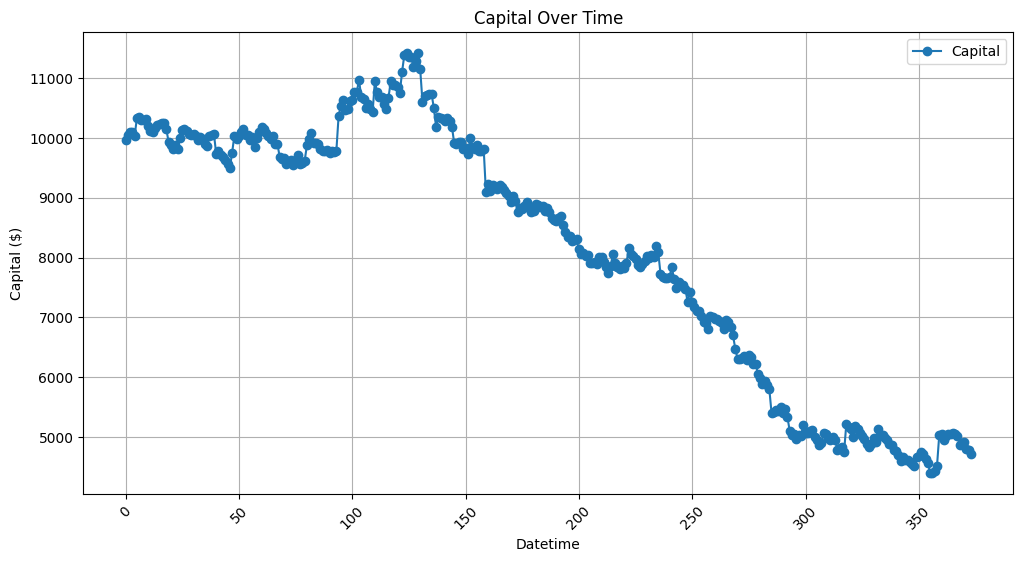

In [63]:
# Plotting the Capital Over Time
plt.figure(figsize=(12, 6))
plt.plot(trades_df.index, trades_df['capital'], marker='o', linestyle='-', label='Capital')
plt.title('Capital Over Time')
plt.xlabel('Datetime')
plt.ylabel('Capital ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

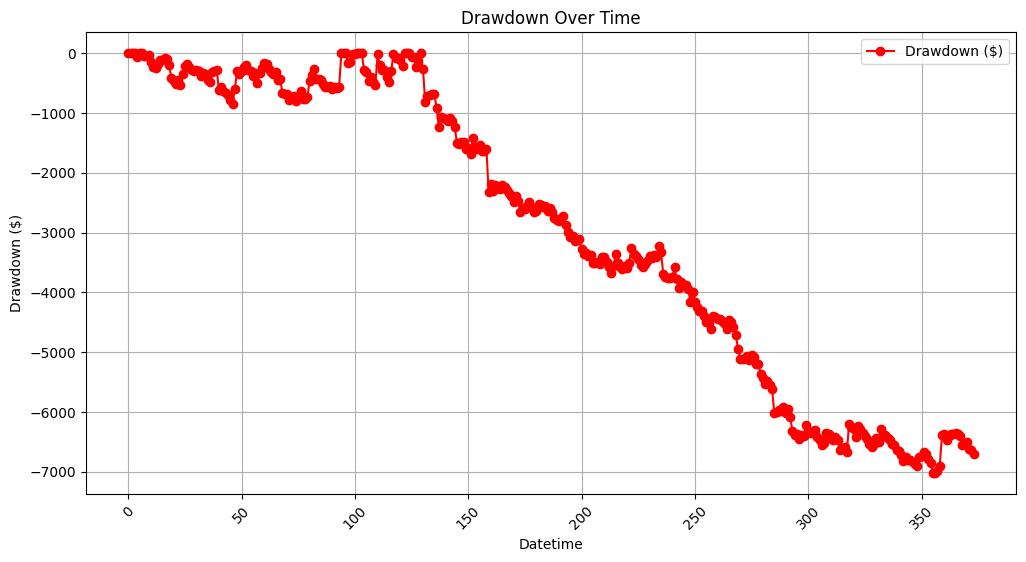

In [64]:
# Plotting the Drawdown Over Time
plt.figure(figsize=(12, 6))
plt.plot(trades_df.index, trades_df['drawdown'], marker='o', linestyle='-', color='red', label='Drawdown ($)')
plt.title('Drawdown Over Time')
plt.xlabel('Datetime')
plt.ylabel('Drawdown ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [65]:
# Ensure the 'date' column is a datetime type and set it as the index

# Extract the hour from the index and store it in a new column
trades_df['hour'] = trades_df['date'].dt.hour

# Group by hour and calculate the total profit and average profit per trade for each hour
hourly_profit = trades_df.groupby('hour')['profit'].agg(['sum', 'mean', 'count']).rename(columns={'sum': 'total_profit', 'mean': 'avg_profit', 'count': 'num_trades'})

print(hourly_profit)



      total_profit  avg_profit  num_trades
hour                                      
0            485.0   11.279070          43
4           -974.0  -22.651163          43
8          -1256.0  -29.209302          43
12          -972.0  -22.604651          43
16         -1162.0  -26.409091          44
17         -1162.0  -10.104348         115
20          -238.0   -5.534884          43


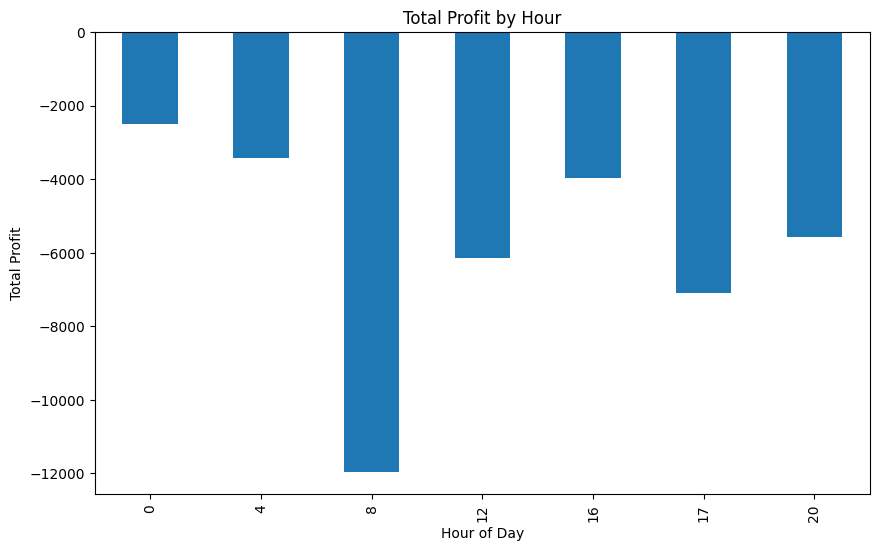

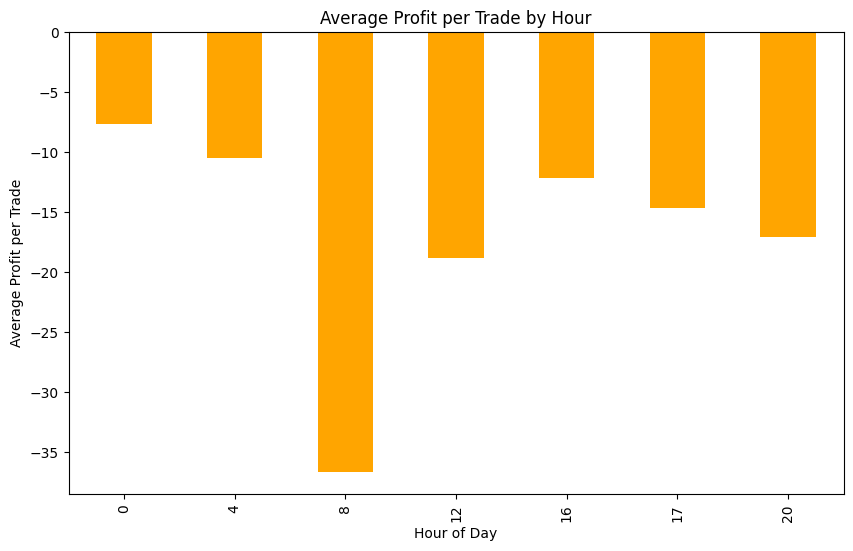

In [52]:
# Plot total profit by hour
hourly_profit['total_profit'].plot(kind='bar', figsize=(10, 6), title='Total Profit by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Profit')
plt.show()

# Plot average profit per trade by hour
hourly_profit['avg_profit'].plot(kind='bar', figsize=(10, 6), color='orange', title='Average Profit per Trade by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Profit per Trade')
plt.show()

# Backtest for fixed time with no re-training

In [86]:
# In your notebook cell
from app_df import PTLClient, get_historical_dataframe, DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID

# Create an instance of your client
client = PTLClient(DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID)

df_test = get_historical_dataframe(client, "EUR", "4 hours", "20250218 04:00:00 US/Eastern", "34 D")

print(df_test.head())

ERROR -1 1740108670222 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 1740108670223 2104 Market data farm connection is OK:cashfarm
ERROR -1 1740108670223 2104 Market data farm connection is OK:usfarm
ERROR -1 1740108670223 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 1740108670223 2106 HMDS data farm connection is OK:ushmds
ERROR -1 1740108670223 2158 Sec-def data farm connection is OK:secdefil


next valid id is 1
getting bar data for EUR 4 hours
end of data 20250115 04:00:00 US/Eastern 20250218 04:00:00 US/Eastern
                              Open     High      Low    Close  Volume
Datetime                                                             
2025-01-01 19:00:00-05:00  1.03506  1.03741  1.03441  1.03716      -1
2025-01-01 23:00:00-05:00  1.03716  1.03758  1.03600  1.03628      -1
2025-01-02 03:00:00-05:00  1.03628  1.03710  1.03136  1.03321      -1
2025-01-02 07:00:00-05:00  1.03321  1.03345  1.02724  1.02741      -1
2025-01-02 11:00:00-05:00  1.02741  1.02762  1.02234  1.02511      -1


In [87]:
# Filter the data to only include the best hours

df_copy = df_test.copy()

# best_hours = [3, 7, 11, 19]
# df_test = df_test[df_test.index.hour.isin(best_hours)]

# Extract the hour from the index and store it in a new column
df_test['hour'] = df_test.index.hour

df_test.head(12)

Open     High      Low    Close  Volume  hour
Datetime                                                                   
2025-01-01 19:00:00-05:00  1.03506  1.03741  1.03441  1.03716      -1    19
2025-01-01 23:00:00-05:00  1.03716  1.03758  1.03600  1.03628      -1    23
2025-01-02 03:00:00-05:00  1.03628  1.03710  1.03136  1.03321      -1     3
2025-01-02 07:00:00-05:00  1.03321  1.03345  1.02724  1.02741      -1     7
2025-01-02 11:00:00-05:00  1.02741  1.02762  1.02234  1.02511      -1    11
2025-01-02 15:00:00-05:00  1.02511  1.02688  1.02506  1.02658      -1    15
2025-01-02 17:15:00-05:00  1.02600  1.02682  1.02600  1.02678      -1    17
2025-01-02 19:00:00-05:00  1.02678  1.02746  1.02659  1.02707      -1    19
2025-01-02 23:00:00-05:00  1.02707  1.02849  1.02646  1.02808      -1    23
2025-01-03 03:00:00-05:00  1.02808  1.03029  1.02728  1.02973      -1     3
2025-01-03 07:00:00-05:00  1.02973  1.03058  1.02729  1.02892      -1     7
2025-01-03 11:00:00-05:00  1.02892  1.03060  1.02835  1.03012      -1    11

In [88]:
X, y = prepare_data(df_test, sma_window=14)
df_test.shape

(234, 18)

In [89]:
# -------------------------------
# We simulate by iterating over the test set (daily candles)
# At the start of each day we use the previous day's features to predict today's move.
# Trading assumptions:
# - If signal is bullish (1), take a long position: profit = (Close - Open)
# - If signal is bearish (0), take a short position: profit = (Open - Close)
# - Capital update per trade is computed on a notional unit basis.
capital = 10000.0  # starting capital in USD
trades = []
l_trades_quantity = 0
s_trades_quantity = 0
features_to_predict = ['Returns', 'Volatility', 'ma5', 'ma10', 'Momentum', 'Close', 'High', 'Low', 'Open']
# Micro lot size: 1 pip = $0.10  (trade volume = 0.1)
# Mini lot size: 1 pip = $1.00 (trade volume = 1)
# Standard lot size: 1 pip = $10.00 (trade volume = 10)
trade_volume = 10
spread = 1.2

best_hours_4h = [4, 8, 12, 16, 17, 20, 0]
best_hours_1h = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
all_hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


def calculate_profit(pips):
    return ((pips - spread) * trade_volume)

# Iterate from the second day of the test period onward so we have a "previous" candle.
for i in range(1, len(df_test)):
    today = df_test.iloc[i]
    yesterday = df_test.iloc[i-1]
    day_before_yesterday = df_test.iloc[i-2]
    
    # Use yesterday's features to predict today's outcome (model was trained to predict next candle's direction)
    model_signal = rf_model.predict([yesterday[features_to_predict].values])[0]
    
    # Apply pattern strategy: if a clear bullish or bearish engulfing pattern is detected,
    # use that signal to override the model prediction.
    pattern_signal = 2

    # Bar UpDown
    if is_bullish_bar(day_before_yesterday, yesterday):
        pattern_signal = 1
    elif is_bearish_bar(day_before_yesterday, yesterday):
        pattern_signal = 0

    # Engulfing
    # if is_bullish_engulfing(day_before_yesterday, yesterday):
    #     pattern_signal = 1
    # elif is_bearish_engulfing(day_before_yesterday, yesterday):
    #     pattern_signal = 0
    
    # Final signal: pattern confirmation takes precedence if available.
    signal = 2
    # signal = pattern_signal if pattern_signal is not 2 else model_signal
    signal = model_signal

    # Final signal Matching both predicted and pattern:
    # if (pattern_signal == model_signal):
    #     signal = pattern_signal
    
    profit = 0.0  # Initialize profit to 0.0 if no trade is made.
    # Simulate trade: enter at the Open and exit at the Close of the day.

    if today['hour'] in all_hours:
        if signal == 1:
            pseudo_pips = today['Close'] - today['Open']
            pips = (pseudo_pips * 10000) 
            profit = calculate_profit(pips)
            l_trades_quantity += 1

        if signal == 0:
            pseudo_pips = today['Open'] - today['Close']
            pips = (pseudo_pips * 10000)
            profit = calculate_profit(pips)
            s_trades_quantity += 1
        
        capital += profit  # Update capital (note: this is a simplified model, not accounting for leverage or trade sizing)
        trades.append({
            'date': today.name,
            'ms': model_signal,
            'ps': pattern_signal,
            's': signal,
            'Open': today['Open'],
            'Close': today['Close'],
            'profit': profit,
            'capital': capital
        })

# Convert trading simulation results to a DataFrame and output results
trades_df = pd.DataFrame(trades)
print("\nTrading Simulation Results:")
print(trades_df.head(30))
print(f"\nLong Trades Quantity: {l_trades_quantity}, " + "\nShort Trades Quantity: ", s_trades_quantity)
print("\nFinal Capital: $", round(capital, 2))

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_


Trading Simulation Results:
                        date  ms  ps  s     Open    Close  profit  capital
0  2025-01-01 23:00:00-05:00   1   1  1  1.03716  1.03628  -100.0   9900.0
1  2025-01-02 03:00:00-05:00   1   0  1  1.03628  1.03321  -319.0   9581.0
2  2025-01-02 07:00:00-05:00   0   2  0  1.03321  1.02741   568.0  10149.0
3  2025-01-02 11:00:00-05:00   0   2  0  1.02741  1.02511   218.0  10367.0
4  2025-01-02 15:00:00-05:00   0   2  0  1.02511  1.02658  -159.0  10208.0
5  2025-01-02 17:15:00-05:00   1   1  1  1.02600  1.02678    66.0  10274.0
6  2025-01-02 19:00:00-05:00   1   2  1  1.02678  1.02707    17.0  10291.0
7  2025-01-02 23:00:00-05:00   1   2  1  1.02707  1.02808    89.0  10380.0
8  2025-01-03 03:00:00-05:00   1   2  1  1.02808  1.02973   153.0  10533.0
9  2025-01-03 07:00:00-05:00   1   2  1  1.02973  1.02892   -93.0  10440.0
10 2025-01-03 11:00:00-05:00   1   0  1  1.02892  1.03012   108.0  10548.0
11 2025-01-03 15:00:00-05:00   1   1  1  1.03012  1.03071    47.0  1059

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_

In [90]:
# Calculate additional metrics

# 1. Cumulative Maximum Capital: running max of the 'capital' column
trades_df['cum_max'] = trades_df['capital'].cummax()

# 2. Drawdown (in dollars) = current capital minus running maximum capital
trades_df['drawdown'] = trades_df['capital'] - trades_df['cum_max']

# 3. Drawdown Percentage
trades_df['drawdown_pct'] = (trades_df['drawdown'] / trades_df['cum_max']) * 100

# 4. Profit Factor:
# Sum up profits from winning trades and absolute losses from losing trades.
total_profit = trades_df.loc[trades_df['profit'] > 0, 'profit'].sum()
total_loss = abs(trades_df.loc[trades_df['profit'] < 0, 'profit'].sum())
profit_factor = total_profit / total_loss if total_loss != 0 else float('inf')

# Print calculated metrics
print("Total Profit: ${:.2f}".format(total_profit))
print("Total Loss: ${:.2f}".format(total_loss))
print("Profit Factor: {:.2f}".format(profit_factor))
print("Maximum Drawdown: ${:.2f}".format(abs(trades_df['drawdown'].min())))
print("Maximum Drawdown (%): {:.2f}%".format(abs(trades_df['drawdown_pct'].min())))



Total Profit: $15374.00
Total Loss: $14856.00
Profit Factor: 1.03
Maximum Drawdown: $3564.00
Maximum Drawdown (%): 28.48%


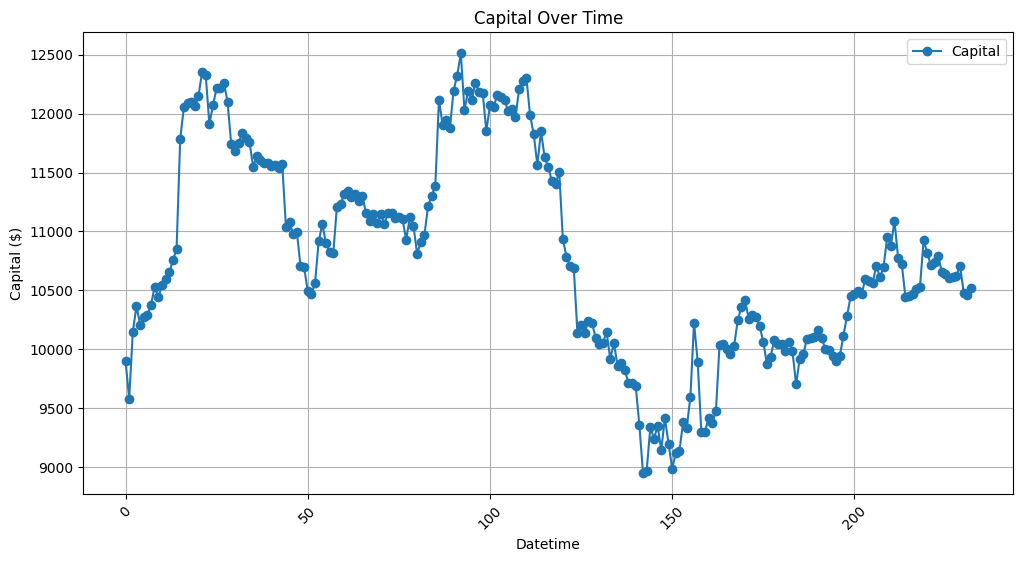

In [91]:
# Plotting the Capital Over Time
plt.figure(figsize=(12, 6))
plt.plot(trades_df.index, trades_df['capital'], marker='o', linestyle='-', label='Capital')
plt.title('Capital Over Time')
plt.xlabel('Datetime')
plt.ylabel('Capital ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

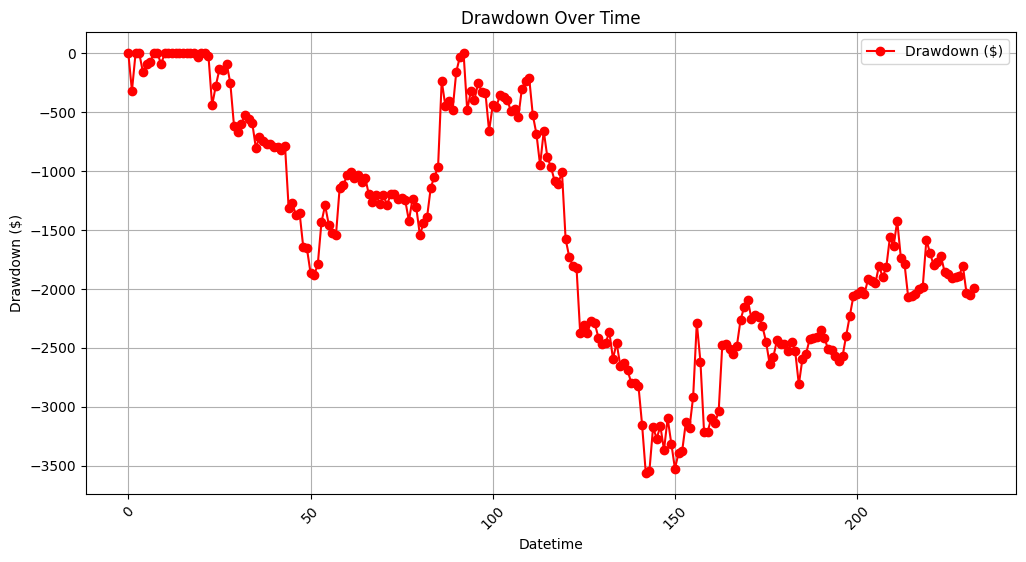

In [92]:
# Plotting the Drawdown Over Time
plt.figure(figsize=(12, 6))
plt.plot(trades_df.index, trades_df['drawdown'], marker='o', linestyle='-', color='red', label='Drawdown ($)')
plt.title('Drawdown Over Time')
plt.xlabel('Datetime')
plt.ylabel('Drawdown ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [93]:
# Ensure the 'date' column is a datetime type and set it as the index

# Extract the hour from the index and store it in a new column
trades_df['hour'] = trades_df['date'].dt.hour

# Group by hour and calculate the total profit and average profit per trade for each hour
hourly_profit = trades_df.groupby('hour')['profit'].agg(['sum', 'mean', 'count']).rename(columns={'sum': 'total_profit', 'mean': 'avg_profit', 'count': 'num_trades'})

print(hourly_profit)



      total_profit  avg_profit  num_trades
hour                                      
3            314.0    9.235294          34
7           1022.0   30.969697          33
11          -124.0   -3.757576          33
15          -207.0   -6.272727          33
17          -158.0   -4.787879          33
19           335.0   10.151515          33
23          -664.0  -19.529412          34


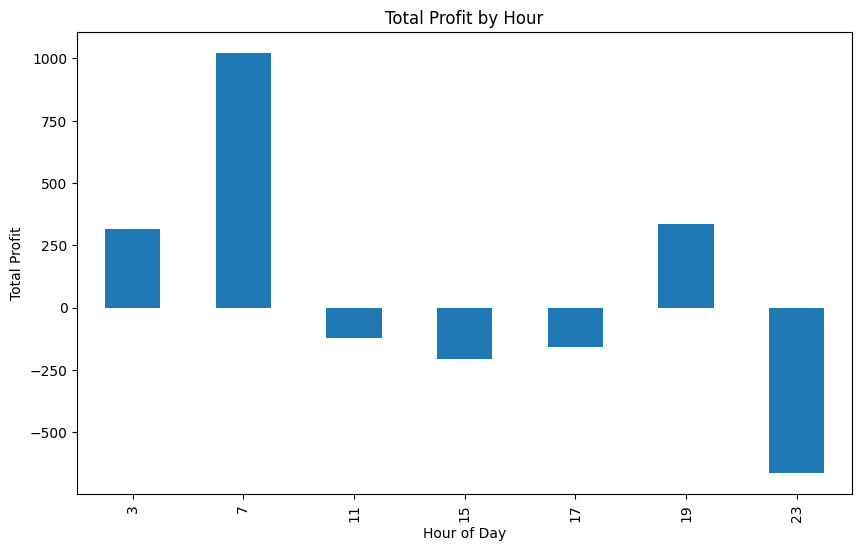

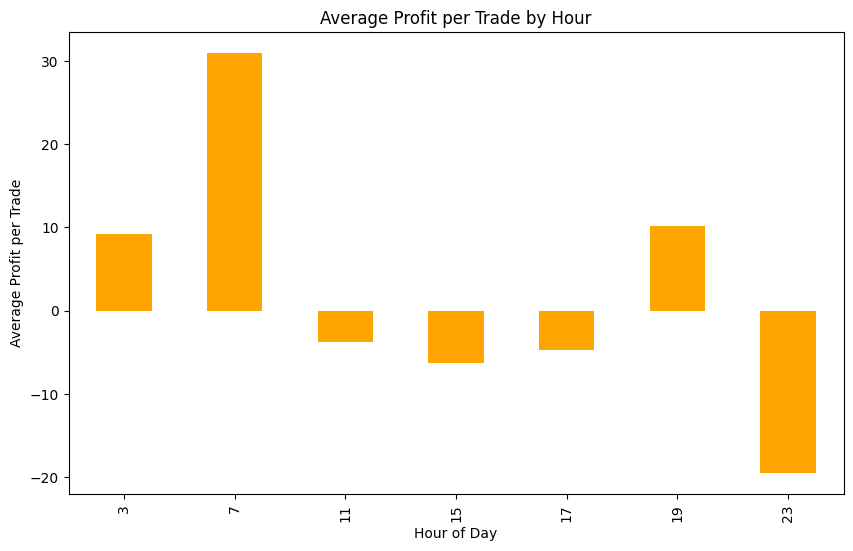

In [94]:
# Plot total profit by hour
hourly_profit['total_profit'].plot(kind='bar', figsize=(10, 6), title='Total Profit by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Profit')
plt.show()

# Plot average profit per trade by hour
hourly_profit['avg_profit'].plot(kind='bar', figsize=(10, 6), color='orange', title='Average Profit per Trade by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Profit per Trade')
plt.show()